### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

%matplotlib inline
import re



### Loading Data

In [2]:
control_df = pd.read_csv('tweets_2016')

In [3]:
control_df = control_df[['tweet_id', 'tweet_text']]

In [4]:
control_df['target'] = 0

In [5]:
control_df

,tweet_id,tweet_text,target
0,7.892854e+17,RT @ReaganBattalion: Obama hates @marcorubio b...,0
1,7.894080e+17,None,0
2,7.893299e+17,RT @lopezdoriga: EN DIRECTO en #Periscope: La ...,0
3,7.893246e+17,RT @wikileaks: There is no US election. There ...,0
4,7.893512e+17,None,0
...,...,...,...
73225,7.892627e+17,None,0
73226,7.893312e+17,RT @activist360: The #AlSmithDinner was no dif...,0
73227,7.893593e+17,None,0
73228,7.892591e+17,None,0


In [6]:
control_df= control_df[control_df.tweet_text != 'None']

In [7]:
control_df

,tweet_id,tweet_text,target
0,7.892854e+17,RT @ReaganBattalion: Obama hates @marcorubio b...,0
2,7.893299e+17,RT @lopezdoriga: EN DIRECTO en #Periscope: La ...,0
3,7.893246e+17,RT @wikileaks: There is no US election. There ...,0
7,7.892696e+17,RT @AJemaineClement: The lamest part of Trump'...,0
14,7.893517e+17,@realDonaldTrump #AlSmithDinner #TrumpTapes #H...,0
...,...,...,...
73211,7.892677e+17,RT @LifeSite: The next ‘deplorables’? Clinton ...,0
73212,7.892680e+17,Speaking is not his thing. He isn't intellectu...,0
73220,7.893777e+17,#Bestseller #greatreads #goodbooks #BookBoost...,0
73226,7.893312e+17,RT @activist360: The #AlSmithDinner was no dif...,0


In [8]:
targetdf =  pd.read_csv('hydrated_tweets')

In [9]:
targetdf

,Unnamed: 0,tweet_id,tweet_text
0,0,1329817517590786054,I'm not saying I believe there was widespread ...
1,1,1330873630515896321,Yes of course! https://t.co/YqpjvH0NoS
2,2,1333262884357419010,@RepPaulMitchell @realDonaldTrump Are you real...
3,3,1331653544579981314,Unity! https://t.co/I625kseVMn
4,4,1329835459200114688,Listen to this https://t.co/uhKFLA3GVz
...,...,...,...
67510,67510,1331580447495696385,OMG https://t.co/QFx2mxyRmj
67511,67511,1324945867833552896,None
67512,67512,1332903191575490562,None
67513,67513,1325128552426057734,#election2020 #election2020results #electionre...


In [10]:
targetdf = targetdf[['tweet_id','tweet_text']]

In [11]:
targetdf['target'] = 1

In [12]:
targetdf

,tweet_id,tweet_text,target
0,1329817517590786054,I'm not saying I believe there was widespread ...,1
1,1330873630515896321,Yes of course! https://t.co/YqpjvH0NoS,1
2,1333262884357419010,@RepPaulMitchell @realDonaldTrump Are you real...,1
3,1331653544579981314,Unity! https://t.co/I625kseVMn,1
4,1329835459200114688,Listen to this https://t.co/uhKFLA3GVz,1
...,...,...,...
67510,1331580447495696385,OMG https://t.co/QFx2mxyRmj,1
67511,1324945867833552896,None,1
67512,1332903191575490562,None,1
67513,1325128552426057734,#election2020 #election2020results #electionre...,1


In [13]:
alldf = control_df.append(targetdf)

In [14]:
alldf.dropna(inplace=True)

In [15]:
alldf= alldf[alldf.tweet_text != 'None']

In [16]:
alldf.set_index('tweet_id', inplace=True)

In [17]:
alldf

,tweet_text,target
tweet_id,,
7.892854e+17,RT @ReaganBattalion: Obama hates @marcorubio b...,0
7.893299e+17,RT @lopezdoriga: EN DIRECTO en #Periscope: La ...,0
7.893246e+17,RT @wikileaks: There is no US election. There ...,0
7.892696e+17,RT @AJemaineClement: The lamest part of Trump'...,0
7.893517e+17,@realDonaldTrump #AlSmithDinner #TrumpTapes #H...,0
...,...,...
1.331498e+18,@ACTBrigitte Count my family and friends. This...,1
1.327466e+18,@JudiciaryGOP @GOPChairwoman @GOP @GOPLeader @...,1
1.331580e+18,OMG https://t.co/QFx2mxyRmj,1


In [18]:
alldf.target.value_counts()

1    41189
0    32067
Name: target, dtype: int64

In [19]:
X= alldf.tweet_text
y = alldf.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
nltk_sw = stopwords.words('english')

In [21]:
cv_dict = {}
def reportcrossval(model, model_name, X, Y):
    cv_mean = cross_val_score(model, X, Y).mean()
    cv_dict[model_name] = cv_mean
    print(f"The cv mean of {model_name} is {cv_mean}")

In [22]:
pipe_dummy = Pipeline([('dummy', DummyClassifier(strategy='most_frequent'))], verbose=True)

In [23]:
pipe_cv_mnnb = Pipeline(steps=[('cv', CountVectorizer()),
                               ('mnnb', MultinomialNB())],
                        verbose=True)

In [24]:
reportcrossval(pipe_dummy, 'Dummy', X_train, y_train)

[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
The cv mean of Dummy is 0.5620654509624294


In [25]:
reportcrossval(pipe_cv_mnnb, 'Default CV and MNNB', X_train, y_train)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.3s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.2s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.2s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.3s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.2s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
The cv mean of Default CV and MNNB is 0.9840377061709423


In [26]:
pipe_cv_mnnb.fit(X_train, y_train)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.5s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s


Pipeline(steps=[('cv', CountVectorizer()), ('mnnb', MultinomialNB())],
         verbose=True)

In [27]:
y_pred = pipe_cv_mnnb.predict(X_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)

In [29]:
cmd = ConfusionMatrixDisplay(cm, display_labels =['Not Misinformation', 'Misinformation'] )

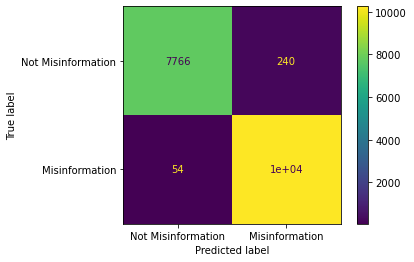

In [30]:
cmd.plot()

In [31]:
results_df = pd.concat([y_test, X_test], axis = 1)


In [32]:
results_df

,target,tweet_text
tweet_id,,
7.893351e+17,0,US-Wahl kompakt: Trump wird bei Benefiz-Dinner...
7.893318e+17,0,RT @ObamaMalik: Trump family loves all people ...
1.329830e+18,1,@Timodc @BillKristol @Nate_Cohn @RVAT2020 I’m ...
7.892862e+17,0,How Trump Will Create More ‘Bad Hombres’: The ...
1.324623e+18,1,"While evidence of VOTER FRAUD is coming in, th..."
...,...,...
7.892639e+17,0,RT @sageboggs: I miss the window in this elect...
7.894076e+17,0,"RT @QuentinKidd: Women, NOVA, coll educ whites..."
1.325414e+18,1,That Time When Joe Biden Bragged About Voter F...


In [33]:
y_pred_proba = pipe_cv_mnnb.predict_proba(X_test)

In [34]:
y_pred_proba = pd.DataFrame(data = y_pred_proba)
y_pred = pd.DataFrame(data = y_pred)

In [35]:
y_pred_proba[0]

0        1.000000e+00
1        1.000000e+00
2        2.039532e-37
3        9.991901e-01
4        1.956150e-26
             ...     
18309    1.000000e+00
18310    1.000000e+00
18311    3.304874e-11
18312    1.000000e+00
18313    1.000000e+00
Name: 0, Length: 18314, dtype: float64

In [36]:
results_df.insert(2, 'prob_not_misinfo', y_pred_proba[0].values)

In [37]:
results_df.insert(3, 'prob_is_misinfo', y_pred_proba[1].values)

In [38]:
results_df.insert(4, 'binary_prediction', y_pred.values)

In [39]:
results_df

,target,tweet_text,prob_not_misinfo,prob_is_misinfo,binary_prediction
tweet_id,,,,,
7.893351e+17,0,US-Wahl kompakt: Trump wird bei Benefiz-Dinner...,1.000000e+00,1.809049e-11,0
7.893318e+17,0,RT @ObamaMalik: Trump family loves all people ...,1.000000e+00,8.240813e-13,0
1.329830e+18,1,@Timodc @BillKristol @Nate_Cohn @RVAT2020 I’m ...,2.039532e-37,1.000000e+00,1
7.892862e+17,0,How Trump Will Create More ‘Bad Hombres’: The ...,9.991901e-01,8.099212e-04,0
1.324623e+18,1,"While evidence of VOTER FRAUD is coming in, th...",1.956150e-26,1.000000e+00,1
...,...,...,...,...,...
7.892639e+17,0,RT @sageboggs: I miss the window in this elect...,1.000000e+00,4.803748e-17,0
7.894076e+17,0,"RT @QuentinKidd: Women, NOVA, coll educ whites...",1.000000e+00,1.600500e-20,0
1.325414e+18,1,That Time When Joe Biden Bragged About Voter F...,3.304874e-11,1.000000e+00,1


In [40]:
errors_df = results_df[results_df['target'] != results_df['binary_prediction']]  

In [41]:
errors_df

,target,tweet_text,prob_not_misinfo,prob_is_misinfo,binary_prediction
tweet_id,,,,,
7.892887e+17,0,. https://t.co/V0eKM7zWNw,0.440877,0.559123,1
7.894026e+17,0,@TylerPreston20 https://t.co/dGCIXnIhah,0.440877,0.559123,1
1.332402e+18,1,@TherapyWestside @KamalaHarris @Official_tyler...,0.968256,0.031744,0
7.893616e+17,0,@BonnieLustsYou the insanity going on. I'm hor...,0.490878,0.509122,1
7.893299e+17,0,@AlexMascitti https://t.co/TjumVRhBnS @LuigiM9...,0.440877,0.559123,1
...,...,...,...,...,...
1.324170e+18,1,ELECTION FRAUD UPDATE: Veritas to release BOMB...,0.997298,0.002702,0
7.893041e+17,0,https://t.co/nZV5cct97i,0.440877,0.559123,1
7.892597e+17,0,#StrategicProperties Election campaigns not fo...,0.350275,0.649725,1


In [42]:
false_neg_df = errors_df[errors_df['target'] == 1]
false_neg_df

,target,tweet_text,prob_not_misinfo,prob_is_misinfo,binary_prediction
tweet_id,,,,,
1.332402e+18,1,@TherapyWestside @KamalaHarris @Official_tyler...,0.968256,3.174444e-02,0
1.325831e+18,1,"Right on, my brother. We were warned way in ad...",1.000000,2.916757e-17,0
1.331452e+18,1,Please Release the KRAKEN Already!!! https://t...,0.815716,1.842841e-01,0
1.330631e+18,1,Rt https://t.co/jqsyAP78M0,0.999639,3.611024e-04,0
1.325338e+18,1,"BREAKING: Project Veritas: Bucks County, Penns...",1.000000,5.531112e-08,0
1.324374e+18,1,@KathyBoockvar \nSEC Of STATE\nCONTROLS PA ELE...,0.894450,1.055501e-01,0
1.326272e+18,1,God Bless Texas https://t.co/ub1CMztASO,0.997132,2.868412e-03,0
1.329820e+18,1,"@beyondreasdoubt The ""election fraud conspirac...",0.742192,2.578082e-01,0
1.330316e+18,1,Thats a fact. So much money and property at st...,0.999999,5.547436e-07,0


In [49]:
false_neg_df.iloc[0].tweet_text

"@TherapyWestside @KamalaHarris @Official_tylerg Tell Kamala, that if she won legally as VP, she should resign her position on the Senate to win the trust of the people and stabilize things. She is already transitioning. She can't do both. People are losing confidence and believing Trump and the voter fraud scam."

I think the model here actually caught the training dataset out here. This was mislabeled! 

In [44]:
false_pos_df = errors_df[errors_df['target'] == 0]

false_pos_df 

,target,tweet_text,prob_not_misinfo,prob_is_misinfo,binary_prediction
tweet_id,,,,,
7.892887e+17,0,. https://t.co/V0eKM7zWNw,0.440877,0.559123,1
7.894026e+17,0,@TylerPreston20 https://t.co/dGCIXnIhah,0.440877,0.559123,1
7.893616e+17,0,@BonnieLustsYou the insanity going on. I'm hor...,0.490878,0.509122,1
7.893299e+17,0,@AlexMascitti https://t.co/TjumVRhBnS @LuigiM9...,0.440877,0.559123,1
7.893708e+17,0,https://t.co/idk95ulWLl,0.440877,0.559123,1
...,...,...,...,...,...
7.893094e+17,0,After this years election https://t.co/BSDTN1PWrH,0.234792,0.765208,1
7.893041e+17,0,https://t.co/nZV5cct97i,0.440877,0.559123,1
7.892597e+17,0,#StrategicProperties Election campaigns not fo...,0.350275,0.649725,1


In [45]:
false_pos_df.sort_values(by = 'prob_not_misinfo', inplace= True)
false_pos_df

<ipython-input-45-56fdc9dd41c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_pos_df.sort_values(by = 'prob_not_misinfo', inplace= True)


,target,tweet_text,prob_not_misinfo,prob_is_misinfo,binary_prediction
tweet_id,,,,,
7.893191e+17,0,"On this ""rigged"" election thing. How are they ...",0.000319,0.999681,1
7.893128e+17,0,Our country doesn't like when people expose th...,0.001096,0.998904,1
7.893118e+17,0,And I believe much of that amount went to FOBs...,0.001175,0.998825,1
7.893849e+17,0,I am however strangely heartened that Trump is...,0.001249,0.998751,1
7.893394e+17,0,"@MaryGarriss this election will be over soon, ...",0.002155,0.997845,1
...,...,...,...,...,...
7.893101e+17,0,"उत्तर प्रदेश में सात चरणों में होंगे Election,...",0.482617,0.517383,1
7.893248e+17,0,ABOUT TIME https://t.co/2MQPhL7M23,0.485500,0.514500,1
7.893274e+17,0,A real gentleman. https://t.co/0lYxvUqHdB,0.487457,0.512543,1


In [46]:
false_pos_df.iloc[4].tweet_text

'@MaryGarriss this election will be over soon, and she will probably win. When its over though- there is so much to be done! &amp;much 2 hope for'

In [47]:
print(false_pos_df.iloc[-2].tweet_text)
print()
print(false_pos_df.iloc[-1].tweet_text)

@BonnieLustsYou the insanity going on. I'm horrified to even think that people actually support any of this election shit.

Not funny👇🏼👇🏼👇🏼 https://t.co/w5ixPZdRHh


Based on these two near missed, I'm worried the model may be overvaluing Trump (which, fair, not sure if I want to mess with that.)